## Data wrangling and vizualizations for #WeRateDogs twitter archive and scraped data via Twitter API

In [185]:
from bs4 import BeautifulSoup
import os
import requests
import pandas as pd
import tweepy
import json
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os import path
from PIL import Image
import numpy as np
import sys
from datetime import datetime
%matplotlib inline
import plotly.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [186]:
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#### First dataset of twitter archive

In [187]:
twitter_ar = pd.read_csv('twitter-archive-enhanced.csv')

In [188]:
twitter_ar.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [189]:
twitter_ar.shape

(2356, 17)

In [190]:
twitter_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Second dataset of image predictions

In [191]:
url ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [192]:
with open(os.path.join(folder_name,url.split('/')[-1]) ,mode='wb') as file:
    file.write(response.content)

In [193]:
image_pred = pd.read_csv('image-predictions/image-predictions.tsv',sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [194]:
image_pred.shape 

(2075, 12)

In [195]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Third dataset of tweets details via twitter API

In [196]:
auth = tweepy.OAuthHandler("xxx", "xxx")
auth.set_access_token("xxx", "xxx")
api = tweepy.API(auth,wait_on_rate_limit=True)

for row in twitter_ar['tweet_id']:
        try:
            tweet = api.get_status(row,tweet_mode='extended')
            with open('tweet_json1.txt', 'a') as outfile:
                    json.dump(tweet._json, outfile)
                    outfile.write('\n')
        except tweepy.TweepError as e: 
            print(e) 
            continue

In [197]:
tweets_data_path = 'tweet_json.txt'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [198]:
df = pd.DataFrame(tweets_data)

In [199]:
df.shape

(2349, 31)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2349 non-null object
display_text_range               2349 non-null object
entities                         2349 non-null object
extended_entities                2070 non-null object
favorite_count                   2349 non-null int64
favorited                        2349 non-null bool
full_text                        2349 non-null object
geo                              0 non-null object
id                               2349 non-null int64
id_str                           2349 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [201]:
tweet_info = df.filter(['id','favorite_count','retweet_count'], axis=1) 
tweet_info.head()

,id,favorite_count,retweet_count
0,892420643555336193,39333,8786
1,892177421306343426,33671,6439
2,891815181378084864,25363,4270
3,891689557279858688,42708,8877
4,891327558926688256,40851,9654


In [202]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 3 columns):
id                2349 non-null int64
favorite_count    2349 non-null int64
retweet_count     2349 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


#### eight (8) quality issues and two (2) tidiness issues
#### wrangling efforts

##### tidyness

In [203]:
#1 doggo floofer pupper puppo columns into 1 column in  twitter_archive      
#2 separate timestamp into date and time twitter_archive                     
#3 seperate source in twitter_archive                                 

#####  quality

In [204]:
#1 get all names of dog some missing                                                                          
#2 rating numerator                                                                                           
#3 rating denominator have to normalise in term of base 10                                                    
#4 text column contains other things                                                                          
#5 combine twitter_ar and tweet_info and image-pred and remove common and not important columns               
#6 remove rows with retweet RT @dog_rates: in text                                                            
#7 remove rows containing retweeted_status_user_id and retweeted_status_timestamp as these are retweets only                                                
#8 expanded_urls in twitter_archive_enhanced contains repeated values in some rows and nans                   
#9 have a row for dog species from the image_predictions   
#10 tweet_id should be object

In [205]:
twitter_ar.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### clean

#### Finding the dog species from the predictions

In [206]:
def dog_species(row):
    if ((row['p1_dog'] == False) &  (row['p2_dog']==True)):
         return row['p2']
    if ((row['p1_dog'] == False) &  (row['p2_dog']==False) & (row['p3_dog']==True)):
         return row['p3']
    if ((row['p1_dog'] == False) &  (row['p2_dog']==False) & (row['p3_dog']==False)):
         return ' '
    else:
         return row['p1']

In [207]:
image_pred['dog_species'] = image_pred.apply(lambda x: dog_species(x),axis=1)

In [208]:
image_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_species
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone


In [209]:
image_pred.drop(['jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],inplace=True,axis=1)

In [210]:
image_pred.head(2)

,tweet_id,dog_species
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone


#### seperate timestamp into date and time twitter_ar

In [211]:
twitter_ar['date'] = twitter_ar['timestamp'].apply(lambda row: row.split(' ')[0])
twitter_ar['time'] = twitter_ar['timestamp'].apply(lambda row: row.split(' ')[1])

In [212]:
twitter_ar.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27


#### separate source into source_url and source_type

In [213]:
twitter_ar['source_url'] = twitter_ar['source'].apply(lambda row: row.split('rel')[0])
twitter_ar['source_type'] = twitter_ar['source'].apply(lambda row: row.split('rel')[1])

In [214]:
twitter_ar.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,source_url,source_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone""","=""nofollow"">Twitter for iPhone</a>"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone""","=""nofollow"">Twitter for iPhone</a>"


#### clean the columns source_url and source_type

In [215]:
twitter_ar['source_url'] = twitter_ar['source_url'].map(lambda x: x.lstrip('<a href=').rstrip('" '))
twitter_ar['source_type'] = twitter_ar['source_type'].map(lambda x: x.lstrip(' ="nofollow">').rstrip('</a>'))

In [216]:
twitter_ar.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,source_url,source_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,2017-08-01,16:23:56,"""http://twitter.com/download/iphone",Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,2017-08-01,00:17:27,"""http://twitter.com/download/iphone",Twitter for iPhone


#### removing the columns which have retweets in them for the dataframe twitter-archive-enhanced.csv

In [217]:
twitter_ar = twitter_ar[pd.isnull(twitter_ar['retweeted_status_id'])] 
twitter_ar = twitter_ar[pd.isnull(twitter_ar['in_reply_to_status_id'])] 
twitter_ar = twitter_ar[pd.isnull(twitter_ar['in_reply_to_user_id'])] 
twitter_ar = twitter_ar[pd.isnull(twitter_ar['retweeted_status_user_id'])] 

In [218]:
twitter_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
date                          2097 non-n

#### cleaning expanded_url column

In [219]:
#before cleaning
twitter_ar.expanded_urls[100]

'https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1'

In [220]:
def rows_combine(t):
    if ',' in t:
        t = t.split(',')[0]
    else:
        t=t
    return(t)

In [221]:
twitter_ar.expanded_urls = twitter_ar.expanded_urls.astype(str)
twitter_ar['expanded_urls'] = twitter_ar.expanded_urls.apply(lambda row: rows_combine(row))

In [222]:
#After using function
twitter_ar.expanded_urls[100]

'https://twitter.com/dog_rates/status/872820683541237760/photo/1'

In [223]:
twitter_ar.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,source_url,source_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,2017-08-01,16:23:56,"""http://twitter.com/download/iphone",Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,2017-08-01,00:17:27,"""http://twitter.com/download/iphone",Twitter for iPhone


In [224]:
twitter_ar['rating_deno'] = 10
twitter_ar = twitter_ar[(twitter_ar.rating_denominator != 0)] 

In [225]:
twitter_ar['rating_num'] = (twitter_ar.rating_numerator/twitter_ar.rating_denominator)*10

In [226]:
twitter_ar.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,date,time,source_url,source_type,rating_deno,rating_num
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,None,None,None,None,2017-08-01,16:23:56,"""http://twitter.com/download/iphone",Twitter for iPhone,10,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,None,None,None,None,2017-08-01,00:17:27,"""http://twitter.com/download/iphone",Twitter for iPhone,10,13.0


In [227]:
twitter_ar.drop(['retweeted_status_id','source','rating_numerator','rating_denominator','timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

#### Removing rows with unnatural ratings

In [228]:
twitter_ar = twitter_ar[twitter_ar.rating_num<=17.0] 

In [229]:
twitter_ar.rating_num.value_counts()

12.000000    490
10.000000    438
11.000000    418
13.000000    287
9.000000     153
8.000000      98
7.000000      51
14.000000     38
5.000000      35
6.000000      32
3.000000      19
4.000000      15
2.000000      10
1.000000       4
0.000000       1
8.181818       1
6.363636       1
Name: rating_num, dtype: int64

#### clean text column

In [230]:
def removeHttp(myString):
    if 'http' in myString: 
        k = myString.index('http')
        myString = myString[0:k]
    
    return myString

In [231]:
#before
twitter_ar.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [232]:
twitter_ar['text'] = twitter_ar.text.apply(lambda row: removeHttp(row))

In [233]:
#After
twitter_ar.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 "

In [234]:
twitter_ar.head(2)

,tweet_id,text,expanded_urls,name,doggo,floofer,pupper,puppo,date,time,source_url,source_type,rating_deno,rating_num
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,2017-08-01,16:23:56,"""http://twitter.com/download/iphone",Twitter for iPhone,10,13.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,2017-08-01,00:17:27,"""http://twitter.com/download/iphone",Twitter for iPhone,10,13.0


In [235]:
def drop_digits(in_str):
    digit_list = "1234567890"
    for char in digit_list:
        in_str = in_str.replace(char, "")
        if '/' in in_str :
            in_str = in_str.replace('/', "")
    return in_str

In [236]:
#before
twitter_ar.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 "

In [237]:
twitter_ar['text'] = twitter_ar.text.apply(lambda row: drop_digits(row))

In [238]:
#after
twitter_ar.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.  "

In [239]:
def removenotdogcolumns(myString):
    myString1 = myString.lower()
    if 'we only rate dogs' in myString1: 
        return ' '
    if 'hammer sherk' in myString1 or 'bad sherk ' in myString1: 
        return ' '
    if 'penguins' in myString1 or 'we. only. rate. dogs' in myString1: 
        return ' '
    if 'this sherk' in myString1: 
        return ' '
    if 'more sherks' in myString1: 
        return ' '    
    else: return myString

In [240]:
twitter_ar['text'] = twitter_ar.text.apply(lambda row: removenotdogcolumns(row))

In [241]:
'we only rate dogs' in twitter_ar.text

False

In [242]:
twitter_ar = twitter_ar[twitter_ar['text'] != ' ']

In [243]:
twitter_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id         2030 non-null int64
text             2030 non-null object
expanded_urls    2030 non-null object
name             2030 non-null object
doggo            2030 non-null object
floofer          2030 non-null object
pupper           2030 non-null object
puppo            2030 non-null object
date             2030 non-null object
time             2030 non-null object
source_url       2030 non-null object
source_type      2030 non-null object
rating_deno      2030 non-null int64
rating_num       2030 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 237.9+ KB


In [244]:
def adddogtype(myString):
    myString1 = myString.lower()
    if 'pupper' in myString1 or 'puppergeddon' in myString1: 
        return 'pupper'
    if 'pupperdoop' in myString1: 
        return 'pupper'
    if 'doggo' in myString1: 
        return 'doggo'
    if 'floofer' in myString1: 
        return 'floofer'
    if 'puppo' in myString1: 
        return 'puppo'
    if '#PrideMonthPuppo' in myString1: 
        return 'puppo'
    else:  return 'None'

In [245]:
twitter_ar['dogType'] = twitter_ar.text.apply(lambda row: adddogtype(row))

In [246]:
twitter_ar.sample(2)

,tweet_id,text,expanded_urls,name,doggo,floofer,pupper,puppo,date,time,source_url,source_type,rating_deno,rating_num,dogType
1248,711363825979756544,"""Please, no puparazzi""",https://twitter.com/dog_rates/status/711363825...,None,None,None,None,None,2016-03-20,01:28:47,"""http://twitter.com/download/iphone",Twitter for iPhone,10,11.0,None
353,831309418084069378,This is Scooter and his son Montoya. Scooter ...,https://twitter.com/dog_rates/status/831309418...,Scooter,None,None,None,None,2017-02-14,01:09:44,"""http://twitter.com/download/iphone",Twitter for iPhone,10,12.0,None


In [247]:
def findname(myString):
    name= ''
    if 'named' in myString:
        k = myString.index('named') + 6
        s = myString[k:len(myString)]
        g = s.find(' ')
        name = s[0:g-1]
    elif 'name is' in myString:
        k1 = myString.index('name is') + 8
        s1 = myString[k1:len(myString)]
        g1 = s1.find(' ')
        name = s1[0:g1-1]
    return name       

In [248]:
findname('This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell.')

'Wylie'

In [249]:
findname('This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesnt like being swallowed by a panda.  ')

'Daryl'

In [250]:
twitter_ar.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [251]:
twitter_ar.sample(2)

,tweet_id,text,expanded_urls,name,date,time,source_url,source_type,rating_deno,rating_num,dogType
1322,706291001778950144,When you're just relaxin and having a swell ti...,https://twitter.com/dog_rates/status/706291001...,None,2016-03-06,01:31:11,"""http://twitter.com/download/iphone",Twitter for iPhone,10,11.0,None
1504,691820333922455552,This is Brockly. He's an uber driver. Falls as...,https://twitter.com/dog_rates/status/691820333...,Brockly,2016-01-26,03:09:55,"""http://twitter.com/download/iphone",Twitter for iPhone,10,8.0,None


In [252]:
twitter_ar['name1'] = twitter_ar.text.apply(lambda row: findname(row))

In [253]:
twitter_ar.to_csv('twitter_archive_edited.csv',index=False)

In [254]:
twitter_master = pd.read_csv('twitter_archive_edited.csv',encoding='latin-1')

In [255]:
#twitter_master.drop('name1',inplace=True,axis=1)

In [256]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 12 columns):
tweet_id         2030 non-null int64
text             2030 non-null object
expanded_urls    2027 non-null object
name             2030 non-null object
date             2030 non-null object
time             2030 non-null object
source_url       2030 non-null object
source_type      2030 non-null object
rating_deno      2030 non-null int64
rating_num       2030 non-null float64
dogType          2030 non-null object
name1            31 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 190.4+ KB


#### Merging the dataframes

In [257]:
twitter_master1 = pd.merge(tweet_info, image_pred, left_on='id', right_on='tweet_id')

In [258]:
twitter_master1.shape

(2070, 5)

In [259]:
twitter_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2069
Data columns (total 5 columns):
id                2070 non-null int64
favorite_count    2070 non-null int64
retweet_count     2070 non-null int64
tweet_id          2070 non-null int64
dog_species       2070 non-null object
dtypes: int64(4), object(1)
memory usage: 97.0+ KB


In [260]:
twitter_master2 =  pd.merge(twitter_master1, twitter_master, left_on='tweet_id', right_on='tweet_id')

In [261]:
twitter_master2.head(2)

,id,favorite_count,retweet_count,tweet_id,dog_species,text,expanded_urls,name,date,time,source_url,source_type,rating_deno,rating_num,dogType,name1
0,892420643555336193,39333,8786,892420643555336193,,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,16:23:56,"""http://twitter.com/download/iphone",Twitter for iPhone,10,13.0,None,NaN
1,892177421306343426,33671,6439,892177421306343426,Chihuahua,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,00:17:27,"""http://twitter.com/download/iphone",Twitter for iPhone,10,13.0,None,NaN


In [262]:
twitter_master2.shape 

(1906, 16)

In [264]:
twitter_master2.to_csv('twitter_archive_master.csv',index=False)

In [282]:
twitter_final = pd.read_csv('twitter_archive_master.csv',encoding='latin-1')

In [283]:
twitter_final.drop(['expanded_urls','source_url','id','name1'],inplace=True,axis=1)
twitter_final.head(2)

,favorite_count,retweet_count,tweet_id,dog_species,text,name,date,time,source_type,rating_deno,rating_num,dogType
0,50103,16463,8.815360e+17,Samoyed,Here is a pupper approaching maximum borkdrive...,None,7/2/2017,15:32:16,Twitter for iPhone,10,14.0,pupper
1,15935,4657,7.929130e+17,,Here is a perfect example of someone who has t...,Forrest,10/31/2016,2:17:31,Twitter for iPhone,10,13.0,None


In [284]:
twitter_final.shape

(1906, 12)

In [285]:
twitter_final['tweet_id'] = twitter_final.tweet_id.apply(lambda row: str(row))

#### converted tweet_id to object

In [286]:
twitter_final.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 12 columns):
favorite_count    1906 non-null int64
retweet_count     1906 non-null int64
tweet_id          1906 non-null object
dog_species       1906 non-null object
text              1906 non-null object
name              1906 non-null object
date              1906 non-null object
time              1906 non-null object
source_type       1906 non-null object
rating_deno       1906 non-null int64
rating_num        1906 non-null float64
dogType           1906 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 178.8+ KB


#### Insight 1:

In [287]:
stop_words = set(stopwords.words('english'))
for i in range(0,len(twitter_final)):
    data= ''.join(twitter_final['text'])
words = data.split()

In [288]:
filtered = []   # new list
for w in words:  #storing only the words from the list 'words' which are not in the stopwords list, thus eliminating the stopwords
    if w not in stop_words:
        filtered.append(w)

In [289]:
def readwords( filename ):
    f = open(filename)
    words = [ line.rstrip() for line in f.readlines()]
    return words

positive = readwords('positive-words.txt')
negative = readwords('negative-words.txt')

In [290]:
#counters for positive and negative words
pos = 0
neg = 0
for i in filtered:
    i = i.rstrip('.,?!\n') # removing possible punctuation signs
    if i in positive:   #checking and incrementing positive words
        pos += 1
    if i in negative:   #checking and incrementing negative words
        neg += 1

In [291]:
print(pos)
print(neg)

1384
803


#### We can see that that the positive sentiment(1384) is way more compared to the negative sentiment(803). The difference is around 500 words, which means that the sentiment is strongly positive. 

In [292]:
twitter_final['date'] = pd.to_datetime(twitter_final['date'])

In [293]:
twitter_final['year'] = twitter_final['date'].apply(lambda x : x.year)
twitter_final['month'] = twitter_final['date'].apply(lambda x : x.month)
twitter_final['day'] = twitter_final['date'].apply(lambda x : x.day)
twitter_final['dayofweek'] = twitter_final['date'].apply(lambda x : x.dayofweek)

In [294]:
twitter_final.head(2)

,favorite_count,retweet_count,tweet_id,dog_species,text,name,date,time,source_type,rating_deno,rating_num,dogType,year,month,day,dayofweek
0,50103,16463,8.81536e+17,Samoyed,Here is a pupper approaching maximum borkdrive...,None,2017-07-02,15:32:16,Twitter for iPhone,10,14.0,pupper,2017,7,2,6
1,15935,4657,7.92913e+17,,Here is a perfect example of someone who has t...,Forrest,2016-10-31,2:17:31,Twitter for iPhone,10,13.0,None,2016,10,31,0


In [295]:
dmap = {0:'Mon',1:"Tue",3:"Wed",4:"Thurs",5:"Fri",6:"Sat",7:"Sun"}
twitter_final['dayofweek'] = twitter_final['dayofweek'].map(dmap)

#### Insight 2:

#### People tweet about their dogs more on Monday and never on Sundays

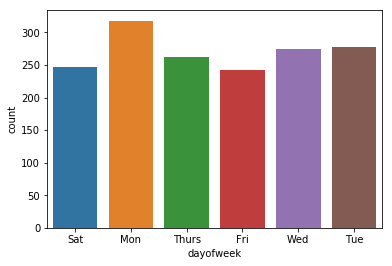

In [296]:
sns.countplot(x="dayofweek",data=twitter_final)

#### Insight 3:

#### People tweet about their dogs more on November,December months. This may be due to the holiday season when people like to post pictures of their dogs

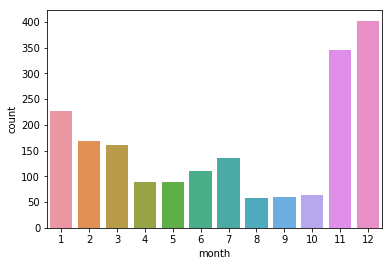

In [297]:
sns.countplot(x="month",data=twitter_final)

#### Insight 4

In [298]:
twitter_final['length'] = twitter_final.text.apply(len)

In [299]:
def firstpart(time_row):
    return time_row.split(':')[0]     
    
def strip_zero(time_row):
    return time_row.strip("0")

def replace_zero(time_row):
    if time_row == '':
        time_row = 0
    else:
        time_row = time_row 
    return time_row 

def time(time_row):
    if time_row >= 0 and time_row <= 8:   
        return 'night'
    if time_row > 16:  
        return 'evening' 
    if time_row > 8 and time_row <= 16:
        return 'morning'

In [300]:
twitter_final['time_cat'] = twitter_final.time.apply(lambda x: firstpart(x))
twitter_final['time_cat'] = twitter_final.time_cat.apply(lambda x: strip_zero(x))
twitter_final['time_cat'] = twitter_final.time_cat.apply(lambda x: replace_zero(x))
twitter_final['time_cat'] = twitter_final.time_cat.apply(lambda x: time(int(x)))

In [301]:
twitter_final.head(2)

,favorite_count,retweet_count,tweet_id,dog_species,text,name,date,time,source_type,rating_deno,rating_num,dogType,year,month,day,dayofweek,length,time_cat
0,50103,16463,8.81536e+17,Samoyed,Here is a pupper approaching maximum borkdrive...,None,2017-07-02,15:32:16,Twitter for iPhone,10,14.0,pupper,2017,7,2,Sat,128,morning
1,15935,4657,7.92913e+17,,Here is a perfect example of someone who has t...,Forrest,2016-10-31,2:17:31,Twitter for iPhone,10,13.0,None,2016,10,31,Mon,100,night


In [302]:
twitter_final.groupby('time_cat')['length'].mean().reset_index(name="mean").sort_values(by='mean', ascending=False)

,time_cat,mean
1,morning,100.313869
0,evening,95.992970
2,night,90.996237


In [303]:
twitter_final.groupby('time_cat')['tweet_id'].count().reset_index(name="Count").sort_values(by='Count', ascending=False)

,time_cat,Count
2,night,1063
0,evening,569
1,morning,274


#### By these two analyses above we see that people tweet less during the morning time but the average length of tweets is higher in the mornings

In [304]:
data = [go.Histogram(x=twitter_final['length'])]
iplot(data, filename='basic histogram')

#### Histogram of tweet lengths which shows that the max of tweet length is around 112 words 

#### Insight 5:

#### The top 10 common dog type pictures posted on @WeRateDogs where Golden Retriever  clearly leads by a high margin. 

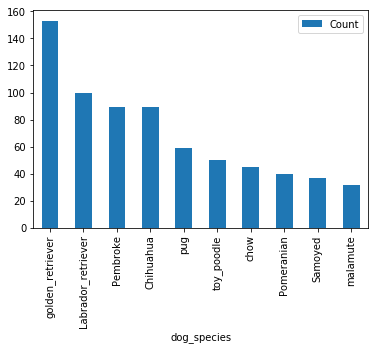

In [306]:
top10 = twitter_final[twitter_final.dog_species != ' '].groupby('dog_species')['tweet_id'].size().reset_index(name="Count").sort_values(by='Count', ascending=False).head(10)
top10.plot.bar('dog_species')

#### Insight 6:

#### The doggo dog type has the hightest number of rating 13 and 11 where as for pupper the maximum rating is 12

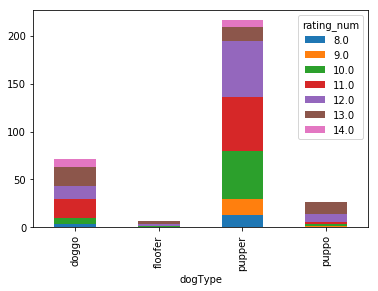

In [310]:
twitter_final1 = twitter_final[(twitter_final.dogType != 'None') & (twitter_final.rating_num>7)].groupby(['dogType','rating_num'])['tweet_id'].size().unstack().plot(kind='bar', stacked=True)

#### Insight 7:

#### The dog species that got most likes is Lakeland terrier. It is followed by Chihuahua, English springer, French bulldog, standard poodle and golden retriever. Although the  dog species whose photos are maximum is golden retriever, people seem to like the photo of Lakeland terrier the best as it has the highest favorite count.  


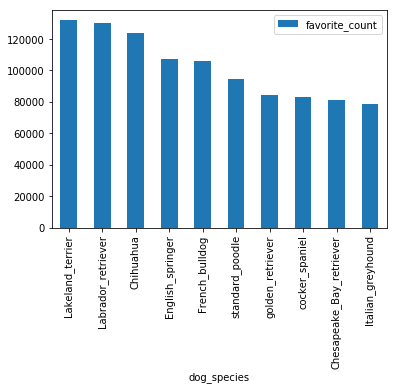

In [311]:
fav = twitter_final.filter(['favorite_count','dog_species']).sort_values(by='favorite_count',ascending=False).head(10)
fav.plot.bar('dog_species')

#### The highest retweets is for Labradar retriever

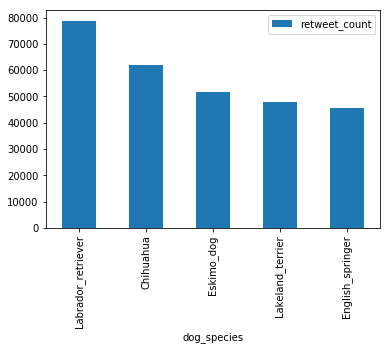

In [318]:
fav1 = twitter_final.filter(['retweet_count','dog_species']).sort_values(by='retweet_count',ascending=False).head(5)
fav1.plot.bar('dog_species')

### Vizualization of most common dog names

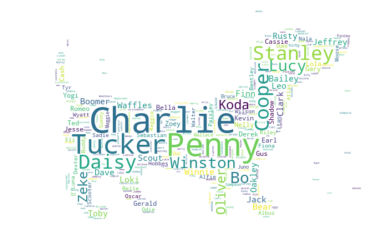

In [312]:
d = path.dirname(sys.argv[0])
dog_mask = np.array(Image.open(path.join(d, "dog_z.jpg")))
f = open("dog.txt")
text = f.read()
stopwords = set(STOPWORDS)
stopwords.add("None")
wc = WordCloud(background_color="white",max_words=2000, mask=dog_mask,stopwords=stopwords)
# generate word cloud
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

#### The most popular dog names are Charlie, Cooper,Bo,Penny,Daisy